In [41]:
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy.linalg import inv
import pandas as pd

In [42]:
from sklearn.datasets import load_boston
boston_data=load_boston()
print(boston_data)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [43]:
boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston.head(10)
print(boston.shape)


(506, 13)


In [50]:
 
plt.figure(figsize=(20, 5))
X=np.array((boston['TAX'],boston['RM'])).T

Y = (boston_data.target)

Y.shape
# X.shape

(506,)

<Figure size 1440x360 with 0 Axes>

In [51]:
class AdalineRegressor:
    def __init__(self):
        pass
    def fit(self,x_train,y_train):
        self.m=np.matmul(inv(np.matmul(x_train.T,x_train)),np.matmul(x_train.T,y_train))
    def predict(self,x_test):
        y_pred=np.matmul(x_test,self.m)
        return y_pred
    def Evaluate_MAE(self,x_test,y_test):
        y_pred=np.matmul(x_test,self.m)
        subtract=np.abs(np.subtract(y_test,y_pred))
        average=np.mean(subtract)
        return average
    def Evaluate_MSE(self,x_test,y_test):
        y_pred=np.matmul(x_test,self.m)
        subtract=np.square(np.subtract(y_test,y_pred))
        average=np.mean(subtract)
        return average
    

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
model=AdalineRegressor()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=40)
model.fit(x_train,y_train)
print("slope:", model.m)
y_pred=np.matmul(X,model.m)

y_pred=model.predict(X)

loss= model.Evaluate_MAE(x_test,y_test)
print('loss_mae',loss)

slope: [-0.0209556   4.93624942]
loss_mae 4.994136947687799


In [54]:

loss= model.Evaluate_MSE(x_test,y_test)
print('loss_mse',loss)

loss_mse 57.53093768891119


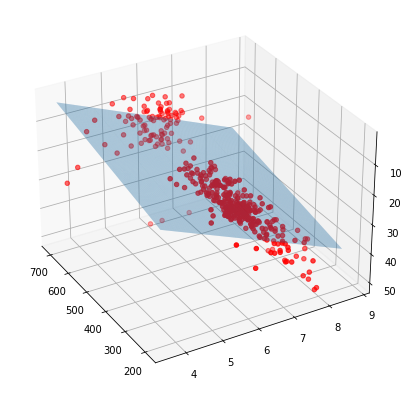

In [55]:
fig=plt.figure(figsize=(7,7))
ax=fig.add_subplot(projection='3d')
x_0_range=np.arange(x_train[:,0].min(),x_train[:,0].max())
x_1_range=np.arange(x_train[:,1].min(),x_train[:,1].max())

x,y = np.meshgrid(x_0_range,x_1_range)
z = x*model.m[0] + y*model.m[1]
ax.plot_surface(x,y,z,rstride=1,cstride=1,alpha=0.4)
ax.scatter(x_train[:,0],x_train[:,1], y_train,c='red',marker='o')
ax.view_init(-150,30)
plt.show()